In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-09-06 13:37:09--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4,8M) [text/csv]
Saving to: 'bbc_text_cls.csv'

     0K .......... .......... .......... .......... ..........  1% 4,91M 1s
    50K .......... .......... .......... .......... ..........  2%  244K 10s
   100K .......... .......... .......... .......... ..........  3% 23,1M 7s
   150K .......... .......... .......... .......... ..........  4% 1,04M 6s
   200K .......... .......... .......... .......... ..........  5% 2,85M 5s
   250K .......... .......... .......... .......... ..........  6%  386K 6s
   300K .......... .......... .......... .......... ..........  7%  140M 5s
   350K .......... .......... .......... .......

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn .model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

In [10]:
df = pd.read_csv('bbc_text_cls.csv')

# map classes to integers 0...K-1
df['targets'] = df['labels'].astype('category').cat.codes
df_train,df_test = train_test_split(df,test_size=0.3)

tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test['text'])

Ytrain = df_train['targets']
Ytest = df_test['targets']

In [18]:
# Number of classes
K = df['targets'].max() +1

# input dimensions
D = Xtrain.shape[1]
print(f"Iput D {K}")

# Build model
i = Input(shape=(D,))
x = Dense(300,activation='relu')(i)
x = Dense(K)(x) # softmax in loss

model = Model(i,x)
model.summary()

Num of classes: 5
Iput D 5


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 25221)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │     7,566,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         1,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,568,105 (28.87 MB)

 Trainable params: 7,568,105 (28.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 777ms/step - accuracy: 0.6989 - loss: 1.5292 - val_accuracy: 0.9626 - val_loss: 1.1597
Epoch 2/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.9830 - loss: 0.9759 - val_accuracy: 0.9746 - val_loss: 0.6908
Epoch 3/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.9938 - loss: 0.4763 - val_accuracy: 0.9865 - val_loss: 0.3890
Epoch 4/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 406ms/step - accuracy: 0.9959 - loss: 0.2091 - val_accuracy: 0.9865 - val_loss: 0.2453
Epoch 5/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 784ms/step - accuracy: 0.9993 - loss: 0.1035 - val_accuracy: 0.9880 - val_loss: 0.1800
Epoch 6/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 1.0000 - loss: 0.0577 - val_accuracy: 0.9880 - val_loss: 0.1483
Epoch 7/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 506ms/step - accuracy: 1.0000 - loss: 0.0377 - val_accuracy: 0.9880 - val_loss: 0.1301


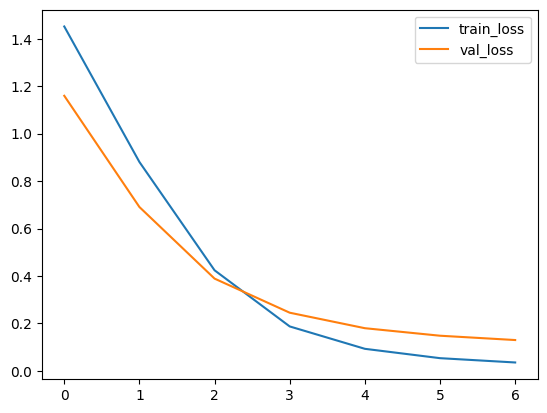

In [13]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
    )

Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

r = model.fit(
    Xtrain,Ytrain,
    validation_data=(Xtest,Ytest),
    epochs = 7,
    batch_size = 128
    
)

# plot loss/iteration

plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

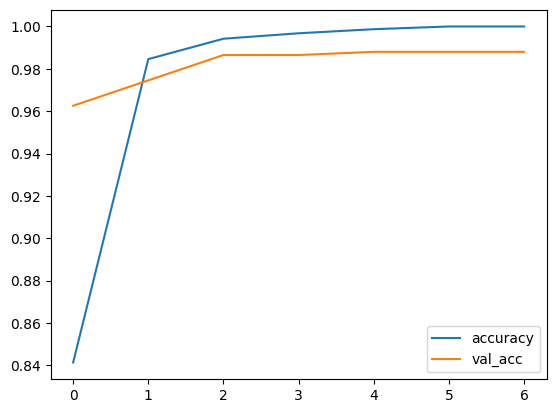

In [15]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()

<Axes: >

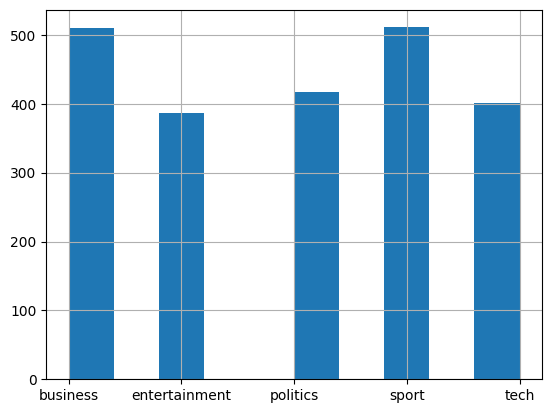

In [16]:
df['labels'].hist()